<a href="https://colab.research.google.com/github/beyda1221/YapayZeka/blob/main/iklimverileri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab için gerekli kütüphaneleri yükleyelim
!pip install pandas openpyxl scikit-learn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# 2. Excel dosyasını yükle
from google.colab import files
uploaded = files.upload()

Saving veriss.xlsx to veriss (3).xlsx


In [ ]:
# 3. Excel dosyasını oku
df = pd.read_excel(list(uploaded.keys())[0])

In [ ]:
# 4. Veri tipi dönüşümleri ve kontroller
df['Profil Tarihi'] = pd.to_datetime(df['Profil Tarihi'], dayfirst=True)
df = df.sort_values('Profil Tarihi')  # Zaman sırasına göre sırala
df = df.reset_index(drop=True)

In [ ]:
# 5. Lag feature'lar oluştur
lag_steps = [1, 2, 3]  # Geçmiş 1, 2 ve 3 saatlik değerler kullanılacak
for lag in lag_steps:
    df[f'lag_{lag}'] = df['Üretim (Veriş)'].shift(lag)

In [ ]:
# 6. İlk lag'lerden dolayı oluşan boş satırları düşür
df = df.dropna()

In [ ]:
# 7. Giriş (X) ve çıkış (y) verilerini ayır
X = df[[f'lag_{lag}' for lag in lag_steps]]
y = df['Üretim (Veriş)']

In [ ]:
# 8. Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
# 9. Modeli oluştur ve eğit
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

# Modeli eğit
model_lr.fit(X_train, y_train)

# 10. Tahmin yap
y_pred_lr = model_lr.predict(X_test)

# 11. Başarıyı değerlendir
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Modeli:")
print(f"Test MAE: {mae_lr:.2f}")
print(f"Test MAPE: {mape_lr:.2f}")
print(f"Test RMSE: {rmse_lr:.2f}")
print(f"Test MSE: {mse_lr:.2f}")
print(f"Test R²: {r2_lr:.4f}")


Linear Regression Modeli:
Test MAE: 20.95
Test MAPE: 25697516093896616.00
Test RMSE: 32.31
Test MSE: 1043.88
Test R²: 0.9370


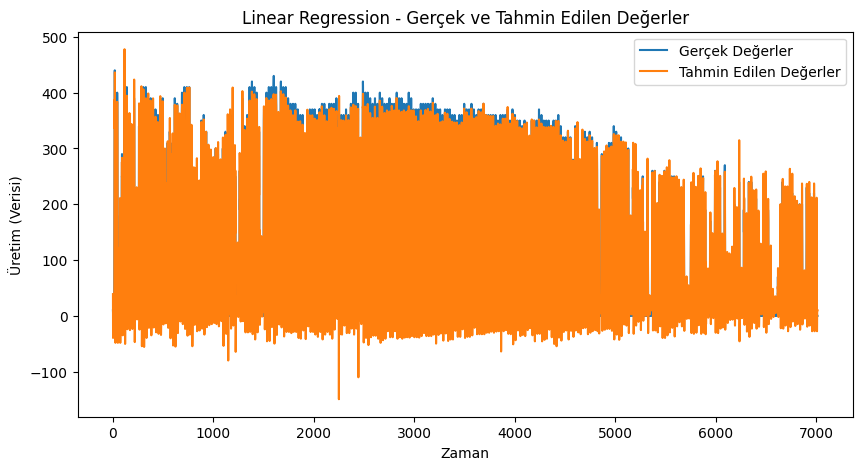

In [ ]:
# Gerçek vs Tahmin Grafiği - Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Gerçek Değerler')
plt.plot(y_pred_lr, label='Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Üretim (Verisi)')
plt.title('Linear Regression - Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()


In [ ]:
# 10. Modeli oluştur ve eğit
from sklearn.ensemble import GradientBoostingRegressor

model_gbt = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Modeli eğit
model_gbt.fit(X_train, y_train)

# 10. Tahmin yap
y_pred_gbt = model_gbt.predict(X_test)

# 11. Başarıyı değerlendir
mae_gbt = mean_absolute_error(y_test, y_pred_gbt)
mape_gbt = mean_absolute_percentage_error(y_test, y_pred_gbt)
rmse_gbt = np.sqrt(mean_squared_error(y_test, y_pred_gbt))
mse_gbt = mean_squared_error(y_test, y_pred_gbt)
r2_gbt = r2_score(y_test, y_pred_gbt)

print(f"Gradient Boosting Modeli:")
print(f"Test MAE: {mae_gbt:.2f}")
print(f"Test MAPE: {mape_gbt:.2f}")
print(f"Test RMSE: {rmse_gbt:.2f}")
print(f"Test MSE: {mse_gbt:.2f}")
print(f"Test R²: {r2_gbt:.4f}")


Gradient Boosting Modeli:
Test MAE: 13.55
Test MAPE: 7104667628469015.00
Test RMSE: 26.30
Test MSE: 691.90
Test R²: 0.9583


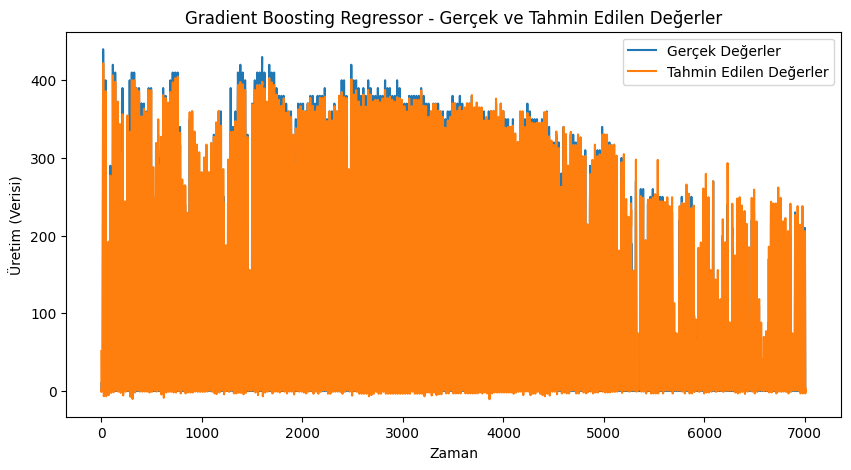

In [ ]:
# Gerçek vs Tahmin Grafiği - Gradient Boosting Regressor
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Gerçek Değerler')
plt.plot(y_pred_gbt, label='Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Üretim (Verisi)')
plt.title('Gradient Boosting Regressor - Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()


In [ ]:
# 11. Modeli oluştur ve eğit
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğit
model_rf.fit(X_train, y_train)

# 10. Tahmin yap
y_pred_rf = model_rf.predict(X_test)

# 11. Başarıyı değerlendir
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Modeli:")
print(f"Test MAE: {mae_rf:.2f}")
print(f"Test MAPE: {mape_rf:.2f}")
print(f"Test RMSE: {rmse_rf:.2f}")
print(f"Test MSE: {mse_rf:.2f}")
print(f"Test R²: {r2_rf:.4f}")


Random Forest Modeli:
Test MAE: 13.83
Test MAPE: 5702567158226997.00
Test RMSE: 28.59
Test MSE: 817.27
Test R²: 0.9507


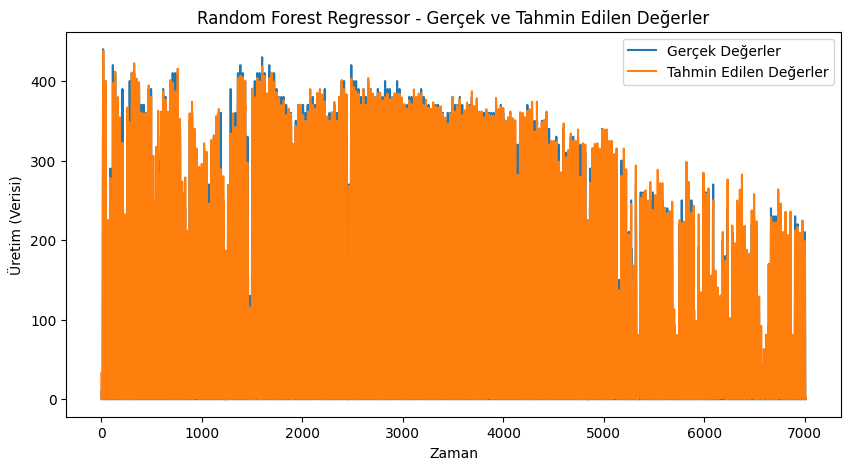

In [ ]:
# Gerçek vs Tahmin Grafiği - Random Forest Regressor
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Gerçek Değerler')
plt.plot(y_pred_rf, label='Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Üretim (Verisi)')
plt.title('Random Forest Regressor - Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()


In [ ]:
# 12 Gerekli kütüphaneleri import et
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Tahmin yap
y_pred_dt = model_dt.predict(X_test)

# Başarıyı değerlendir
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Sonuçları yazdır
print(f"Decision Tree Regressor Modeli:")
print(f"Test MAE: {mae_dt:.2f}")
print(f"Test MAPE: {mape_dt:.2f}")
print(f"Test RMSE: {rmse_dt:.2f}")
print(f"Test MSE: {mse_dt:.2f}")
print(f"Test R²: {r2_dt:.4f}")


Decision Tree Regressor Modeli:
Test MAE: 15.16
Test MAPE: 5815110462740688.00
Test RMSE: 33.03
Test MSE: 1090.78
Test R²: 0.9342


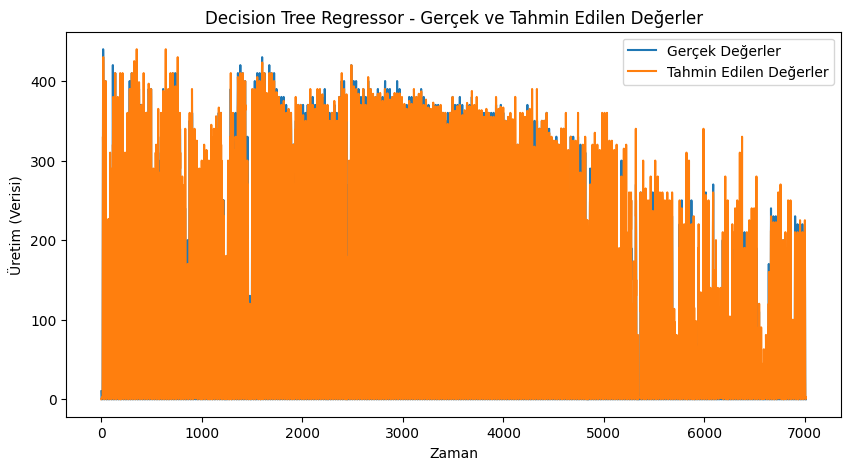

In [ ]:
# Gerçek vs Tahmin Grafiği - Decision Tree Regressor
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Gerçek Değerler')
plt.plot(y_pred_dt, label='Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Üretim (Verisi)')
plt.title('Decision Tree Regressor - Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()


In [ ]:
# 13 Gerekli kütüphaneleri import et
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit
model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = model_xgb.predict(X_test)

# Başarıyı değerlendir
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Sonuçları yazdır
print(f"XGBoost Regressor Modeli:")
print(f"Test MAE: {mae_xgb:.2f}")
print(f"Test MAPE: {mape_xgb:.2f}")
print(f"Test RMSE: {rmse_xgb:.2f}")
print(f"Test MSE: {mse_xgb:.2f}")
print(f"Test R²: {r2_xgb:.4f}")


XGBoost Regressor Modeli:
Test MAE: 13.05
Test MAPE: 5689414215312651.00
Test RMSE: 26.80
Test MSE: 718.38
Test R²: 0.9567


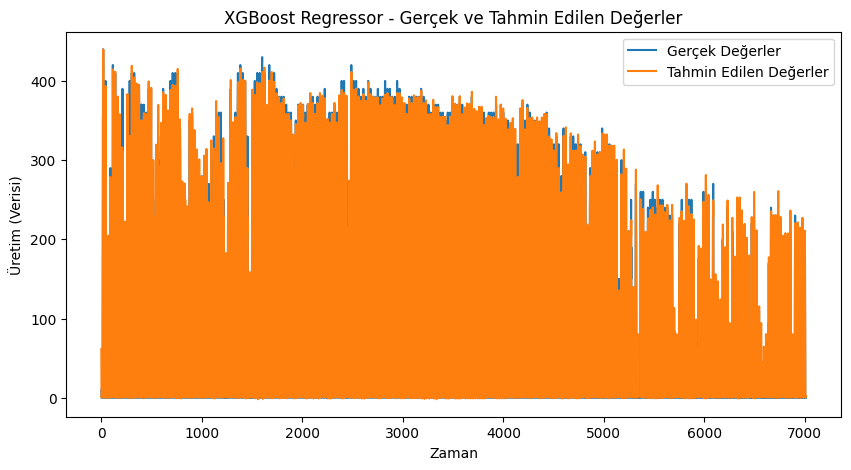

In [ ]:
# Gerçek vs Tahmin Grafiği - XGBoost Regressor
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Gerçek Değerler')
plt.plot(y_pred_xgb, label='Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Üretim (Verisi)')
plt.title('XGBoost Regressor - Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()
